In [ ]:
# !pip install missingno==0.4.1

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt  
import seaborn as sns

# 이상치 제거 + 알코올 이상하게 들어있는 값 엑셀에서 처리 후 불러오기

In [3]:
wine_df = pd.read_excel("preprocessing_data/wine_valuechange.xlsx")
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23756 entries, 0 to 23755
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     23756 non-null  object 
 1   price    23687 non-null  float64
 2   score    23756 non-null  float64
 3   winery   23756 non-null  object 
 4   grapes   23696 non-null  object 
 5   country  23749 non-null  object 
 6   region   23749 non-null  object 
 7   alcohol  14517 non-null  float64
 8   foods    23475 non-null  object 
 9   wine_id  23756 non-null  int64  
 10  re       23756 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.0+ MB


In [4]:
wine_df.isnull().sum()

name          0
price        69
score         0
winery        0
grapes       60
country       7
region        7
alcohol    9239
foods       281
wine_id       0
re            0
dtype: int64

# Alcohol 결측치 채우기

In [5]:
wine_mean = wine_df['alcohol'].mean() # 전체 알콜 평균

In [6]:
all_grapes = wine_df['grapes'].unique() # 포도 품종 리스트 

In [7]:
# 포도 품종 별로 알콜 평균으로 채워줌 
for i in range(len(wine_df)):
    for grape in all_grapes:
        try:
            if wine_df['grapes'][i]==grape:
                if (math.isnan(wine_df['alcohol'][i])==True) | (wine_df['alcohol'][i] == 0.0):
                    wine_price.at[i,'alcohol'] = wine_df[wine_df['grapes']==grape]['alcohol'].mean()
        except:
            continue

In [8]:
# 포도 품종이 1개 밖에 없거나 다 결측치인 경우도 있기 때문에 그런 경우에는 전체 알콜 평균으로 채워줌 
wine_df['alcohol'].fillna(wine_mean,inplace=True) 

In [9]:
wine_df['alcohol'].replace(0.0,wine_mean,inplace=True)

In [10]:
wine_df.isnull().sum()

name         0
price       69
score        0
winery       0
grapes      60
country      7
region       7
alcohol      0
foods      281
wine_id      0
re           0
dtype: int64

# id열 중복제거

In [11]:
wine_df['wine_id'].value_counts()

24469086    2
23382023    2
25199482    2
24943458    2
3267125     2
           ..
14738153    1
23849704    1
26472505    1
20726364    1
21366783    1
Name: wine_id, Length: 23628, dtype: int64

In [12]:
#id열 중복제거
wine_df['wine_id'] = wine_df['wine_id'].drop_duplicates( keep='first', inplace=False)

In [13]:
wine_df['wine_id'].value_counts()

20348341.0    1
14002336.0    1
25594110.0    1
25911720.0    1
20490586.0    1
             ..
10386672.0    1
18882260.0    1
9560434.0     1
25383599.0    1
25601408.0    1
Name: wine_id, Length: 23628, dtype: int64

# 결측치 제거

In [14]:
wine_df.isnull().sum()

name         0
price       69
score        0
winery       0
grapes      60
country      7
region       7
alcohol      0
foods      281
wine_id    128
re           0
dtype: int64

In [15]:
wine_df = wine_df.dropna(axis=0)

In [16]:
wine_df.isnull().sum()

name       0
price      0
score      0
winery     0
grapes     0
country    0
region     0
alcohol    0
foods      0
wine_id    0
re         0
dtype: int64

In [17]:
#min/max scaling 이후 데이터 합칠 때를 위해서

wine_df = wine_df.reset_index(drop=True)

In [18]:
wine_df.head()

,name,price,score,winery,grapes,country,region,alcohol,foods,wine_id,re
0,Rim Rock Vineyard Syrah 2017,52.99,4.3,Piedrasassi,Shiraz/Syrah,United States,Arroyo Grande Valley,13.500000,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",19603399.0,['Dry tingly cool bottle pairs with seafood ho...
1,Tradition Ch창teauneuf-du-Pape 2015,54.99,4.2,Domaine Giraud,Grenache,France,Ch창teauneuf-du-Pape,13.491631,"['Lamb', 'Pork', 'Poultry']",18191466.0,"['Black cherry, oak. Leather, earthy. Great b..."
2,Estate Cabernet Sauvignon 2013,73.95,4.3,Brandlin,Cabernet Sauvignon,United States,Mount Veeder,13.491631,"['Beef', 'Lamb', 'Game (deer, venison)', 'Matu...",13886692.0,['Wine walk favorite! This estate cab is fant...
3,Imperio LXXIV Primitivo di Manduria 2018,19.99,4.2,Feudo Croce,Primitivo,Italy,Primitivo di Manduria,14.500000,"['Beef', 'Pasta', 'Lamb', 'Poultry']",25311528.0,"['Plum, fig, pepper, cherry. ', 'Lots of dark ..."
4,Corte di Cama Sforzato di Valtellina 2016,58.50,4.3,Mamete Prevostini,Nebbiolo,Italy,Sforzato della Valtellina,13.491631,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",25588649.0,['A bit of a disappointment honestly. Have rea...


In [19]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23241 entries, 0 to 23240
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     23241 non-null  object 
 1   price    23241 non-null  float64
 2   score    23241 non-null  float64
 3   winery   23241 non-null  object 
 4   grapes   23241 non-null  object 
 5   country  23241 non-null  object 
 6   region   23241 non-null  object 
 7   alcohol  23241 non-null  float64
 8   foods    23241 non-null  object 
 9   wine_id  23241 non-null  float64
 10  re       23241 non-null  object 
dtypes: float64(4), object(7)
memory usage: 2.0+ MB


#EDA

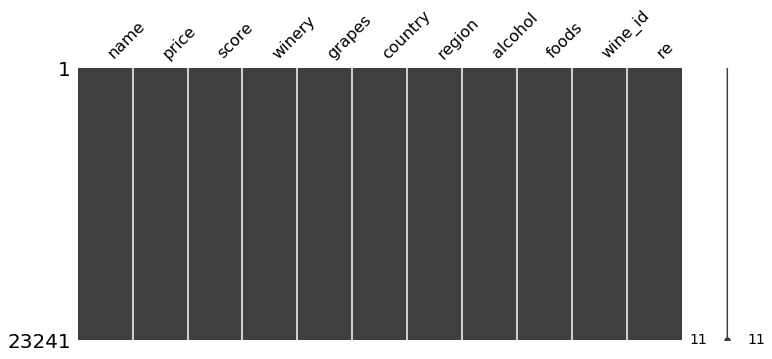

In [21]:
msno.matrix(wine_df, figsize=(12,5))

# Min_Max_Scaling

In [29]:
wine_df.head()

,name,price,score,winery,grapes,country,region,alcohol,foods,wine_id,re
0,Rim Rock Vineyard Syrah 2017,52.99,4.3,Piedrasassi,Shiraz/Syrah,United States,Arroyo Grande Valley,13.500000,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",19603399.0,['Dry tingly cool bottle pairs with seafood ho...
1,Tradition Ch창teauneuf-du-Pape 2015,54.99,4.2,Domaine Giraud,Grenache,France,Ch창teauneuf-du-Pape,13.491631,"['Lamb', 'Pork', 'Poultry']",18191466.0,"['Black cherry, oak. Leather, earthy. Great b..."
2,Estate Cabernet Sauvignon 2013,73.95,4.3,Brandlin,Cabernet Sauvignon,United States,Mount Veeder,13.491631,"['Beef', 'Lamb', 'Game (deer, venison)', 'Matu...",13886692.0,['Wine walk favorite! This estate cab is fant...
3,Imperio LXXIV Primitivo di Manduria 2018,19.99,4.2,Feudo Croce,Primitivo,Italy,Primitivo di Manduria,14.500000,"['Beef', 'Pasta', 'Lamb', 'Poultry']",25311528.0,"['Plum, fig, pepper, cherry. ', 'Lots of dark ..."
4,Corte di Cama Sforzato di Valtellina 2016,58.50,4.3,Mamete Prevostini,Nebbiolo,Italy,Sforzato della Valtellina,13.491631,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",25588649.0,['A bit of a disappointment honestly. Have rea...


In [30]:
from sklearn.preprocessing import MinMaxScaler

score_scaler = MinMaxScaler()
score_scaler

MinMaxScaler()

In [34]:
mima_wine = wine_df[['price','score','alcohol']]

In [35]:
# 모델을 돌리기 위해 array화

score_data = mima_wine.values
score_data

array([[ 52.99     ,   4.3      ,  13.5      ],
       [ 54.99     ,   4.2      ,  13.4916305],
       [ 73.95     ,   4.3      ,  13.4916305],
       ...,
       [ 79.99     ,   4.4      ,  14.4      ],
       [369.99     ,   4.5      ,  13.4916305],
       [ 33.99     ,   4.3      ,  13.       ]])

In [36]:
score_scaler.fit(score_data)

MinMaxScaler()

In [37]:
result= score_scaler.transform(score_data)

In [38]:
result_df = pd.DataFrame(result,columns=['s_price','s_score','s_alcohol'])
result_df.head()

,s_price,s_score,s_alcohol
0,0.004801,0.333333,0.237968
1,0.005003,0.222222,0.237744
2,0.006919,0.333333,0.237744
3,0.001465,0.222222,0.264706
4,0.005358,0.333333,0.237744


In [39]:
#데이터 합치기

df = pd.concat([wine_df,result_df],axis=1)
df.head()

,name,price,score,winery,grapes,country,region,alcohol,foods,wine_id,re,s_price,s_score,s_alcohol
0,Rim Rock Vineyard Syrah 2017,52.99,4.3,Piedrasassi,Shiraz/Syrah,United States,Arroyo Grande Valley,13.500000,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",19603399.0,['Dry tingly cool bottle pairs with seafood ho...,0.004801,0.333333,0.237968
1,Tradition Ch창teauneuf-du-Pape 2015,54.99,4.2,Domaine Giraud,Grenache,France,Ch창teauneuf-du-Pape,13.491631,"['Lamb', 'Pork', 'Poultry']",18191466.0,"['Black cherry, oak. Leather, earthy. Great b...",0.005003,0.222222,0.237744
2,Estate Cabernet Sauvignon 2013,73.95,4.3,Brandlin,Cabernet Sauvignon,United States,Mount Veeder,13.491631,"['Beef', 'Lamb', 'Game (deer, venison)', 'Matu...",13886692.0,['Wine walk favorite! This estate cab is fant...,0.006919,0.333333,0.237744
3,Imperio LXXIV Primitivo di Manduria 2018,19.99,4.2,Feudo Croce,Primitivo,Italy,Primitivo di Manduria,14.500000,"['Beef', 'Pasta', 'Lamb', 'Poultry']",25311528.0,"['Plum, fig, pepper, cherry. ', 'Lots of dark ...",0.001465,0.222222,0.264706
4,Corte di Cama Sforzato di Valtellina 2016,58.50,4.3,Mamete Prevostini,Nebbiolo,Italy,Sforzato della Valtellina,13.491631,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",25588649.0,['A bit of a disappointment honestly. Have rea...,0.005358,0.333333,0.237744


# 도수, 가격 높고 낮음 선호도를 위해 열 추가

In [40]:
df['rev_s_alcohol'] = 1.0 - df['s_alcohol']
df['rev_s_alcohol'].head()

0    0.762032
1    0.762256
2    0.762256
3    0.735294
4    0.762256
Name: rev_s_alcohol, dtype: float64

In [41]:
df['rev_s_price'] = 1.0 - df['s_price']
df['rev_s_price'].head()

0    0.995199
1    0.994997
2    0.993081
3    0.998535
4    0.994642
Name: rev_s_price, dtype: float64

In [42]:
df.head()

,name,price,score,winery,grapes,country,region,alcohol,foods,wine_id,re,s_price,s_score,s_alcohol,rev_s_alcohol,rev_s_price
0,Rim Rock Vineyard Syrah 2017,52.99,4.3,Piedrasassi,Shiraz/Syrah,United States,Arroyo Grande Valley,13.500000,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",19603399.0,['Dry tingly cool bottle pairs with seafood ho...,0.004801,0.333333,0.237968,0.762032,0.995199
1,Tradition Ch창teauneuf-du-Pape 2015,54.99,4.2,Domaine Giraud,Grenache,France,Ch창teauneuf-du-Pape,13.491631,"['Lamb', 'Pork', 'Poultry']",18191466.0,"['Black cherry, oak. Leather, earthy. Great b...",0.005003,0.222222,0.237744,0.762256,0.994997
2,Estate Cabernet Sauvignon 2013,73.95,4.3,Brandlin,Cabernet Sauvignon,United States,Mount Veeder,13.491631,"['Beef', 'Lamb', 'Game (deer, venison)', 'Matu...",13886692.0,['Wine walk favorite! This estate cab is fant...,0.006919,0.333333,0.237744,0.762256,0.993081
3,Imperio LXXIV Primitivo di Manduria 2018,19.99,4.2,Feudo Croce,Primitivo,Italy,Primitivo di Manduria,14.500000,"['Beef', 'Pasta', 'Lamb', 'Poultry']",25311528.0,"['Plum, fig, pepper, cherry. ', 'Lots of dark ...",0.001465,0.222222,0.264706,0.735294,0.998535
4,Corte di Cama Sforzato di Valtellina 2016,58.50,4.3,Mamete Prevostini,Nebbiolo,Italy,Sforzato della Valtellina,13.491631,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",25588649.0,['A bit of a disappointment honestly. Have rea...,0.005358,0.333333,0.237744,0.762256,0.994642


In [97]:
df.to_csv('wine_realrealfinal.csv')